<a href="https://colab.research.google.com/github/Soloskey1/Student-Dropout-and-Success-Prediction-/blob/master/Student_Droput_and_Success_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Dropout and Academic Success**




In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# load data
data = pd.read_csv('/content/drive/MyDrive/my_data/data.csv', delimiter=';')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# size of the data
data.shape

(4424, 37)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

From output above, there is no null values in the dataset.

In [5]:
# Check if any missing values exist in the entire DataFrame
print(data.isnull().values.any())

False


In [6]:
# columns
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [7]:
# data summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


# EXPLORATORY DATA ANALYSIS

**Daytime/evening** - Binary categorical feature <br>
1 - Daytime, 0 - Evenning

In [8]:
# get unique dayatime/evening attendance
print(data['Daytime/evening attendance\t'].unique())

# count of number of students in attendance for each session
data['Daytime/evening attendance\t'].value_counts()

[1 0]


,count
Daytime/evening attendance,
1,3941
0,483


In [9]:
# unique categories in 'Target'
data['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


Graduates comprised the largest group within the dataset, totaling 2,209 individuals. There were 1,421 dropouts and 794 students currently enrolled in school.

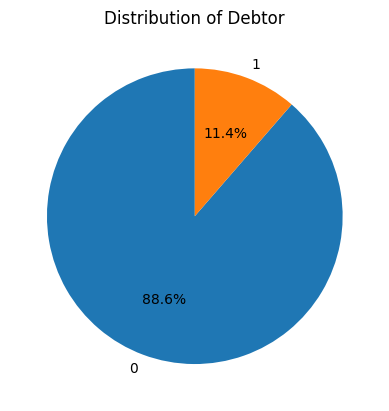

In [29]:
# Count the occurrences of each category in 'Debtor'
debtor_counts = data['Debtor'].value_counts()

# Create the pie chart with labels
debtor_counts.plot(kind='pie',
                   labels=debtor_counts.index,  # Use category names as labels
                   autopct='%1.1f%%',  # Display percentages with 1 decimal place
                   startangle=90)  # Rotate the start angle for better visualization

plt.title('Distribution of Debtor')  # Add a title to the chart
plt.ylabel('')  # Remove the default ylabel
plt.show()

A large proportion of students, 88.6%, are without debts, while 11.4% have debts. <br> <br>

To analyze the relationship between age, debt status, and academic outcomes (targets), I will categorize students into age groups and then calculate the proportion of each target (Graduate, Dropout, Enrolled) within each age group and debt status.


Analysis for Target: Dropout
Debtor            0         1
Age Group                    
16-20      0.797048  0.202952
21-25      0.786441  0.213559
26-30      0.759825  0.240175
31-35      0.768707  0.231293
36-40      0.776596  0.223404
41-45      0.692308  0.307692
46-50      0.775000  0.225000
51-55      0.800000  0.200000
56-60      1.000000  0.000000
61-65      1.000000  0.000000
66-70      0.000000  1.000000


<ipython-input-38-5ea130f1157b>:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



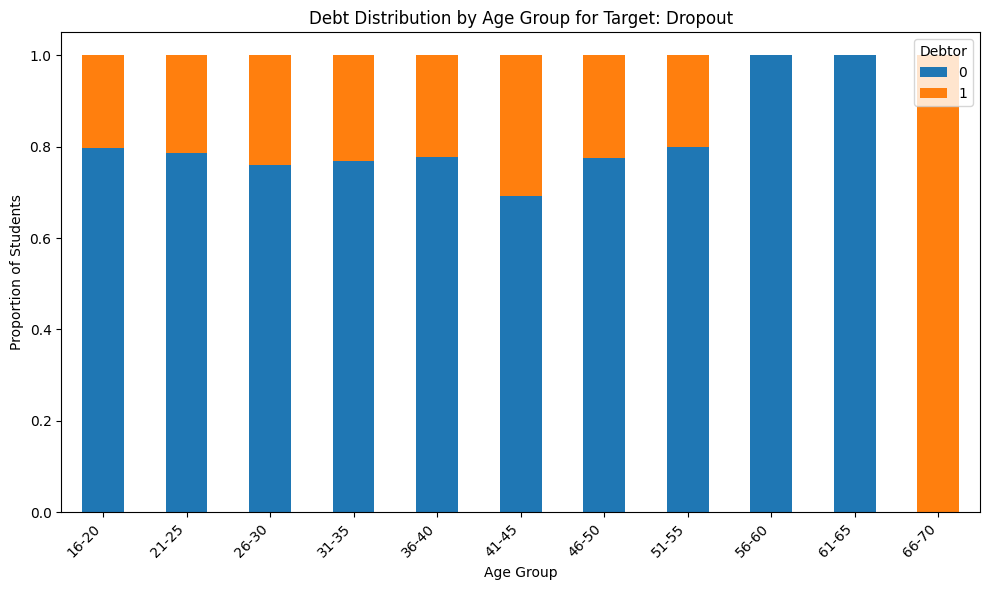


Analysis for Target: Graduate
Debtor            0         1
Age Group                    
16-20      0.959688  0.040312
21-25      0.937322  0.062678
26-30      0.969072  0.030928
31-35      0.930233  0.069767
36-40      0.923077  0.076923
41-45      0.954545  0.045455
46-50      0.909091  0.090909
51-55      1.000000  0.000000
56-60      1.000000  0.000000
61-65      1.000000  0.000000
66-70      0.000000  0.000000


<ipython-input-38-5ea130f1157b>:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



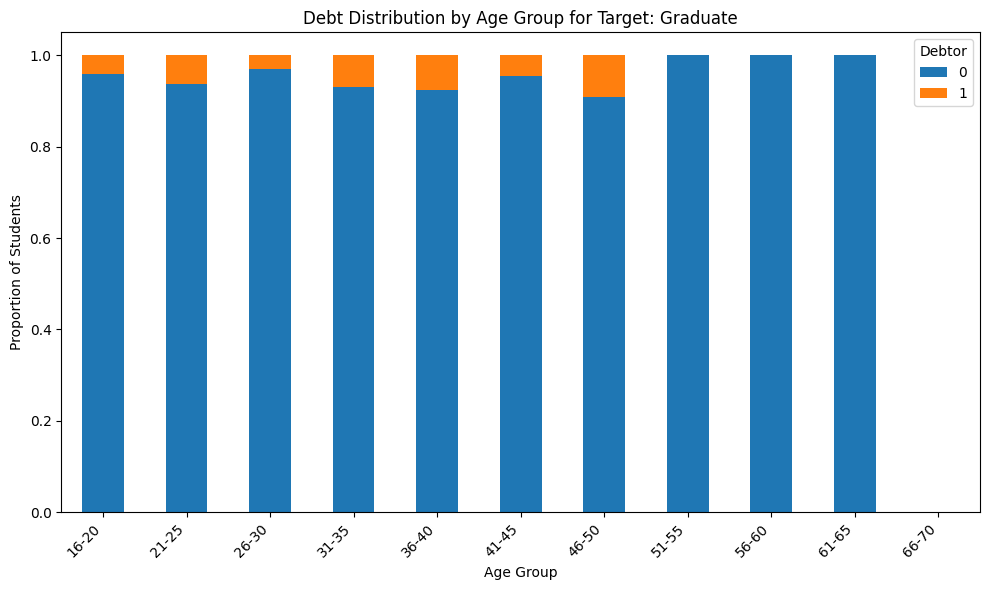


Analysis for Target: Enrolled
Debtor            0         1
Age Group                    
16-20      0.923567  0.076433
21-25      0.818681  0.181319
26-30      0.842105  0.157895
31-35      0.864865  0.135135
36-40      0.857143  0.142857
41-45      0.812500  0.187500
46-50      0.875000  0.125000
51-55      1.000000  0.000000
56-60      0.000000  0.000000
61-65      0.000000  0.000000
66-70      0.000000  0.000000


<ipython-input-38-5ea130f1157b>:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



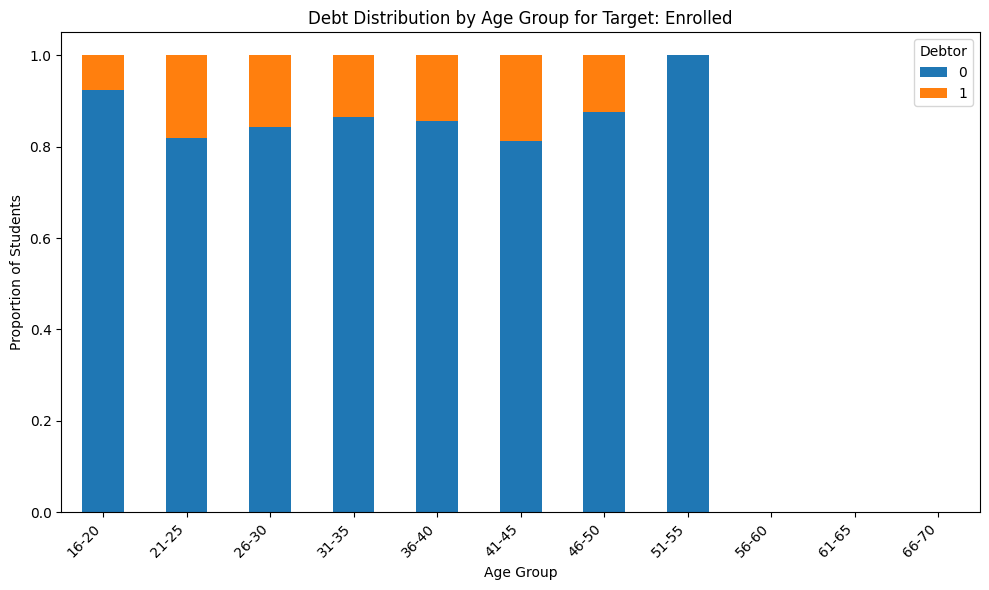

In [38]:
# Define age brackets and labels
age_bins = [16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71]  # Define your age bins here, include upper limit
age_labels = ['16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70']  # since the max age is 70.

# Create a new 'Age Group' column
data['Age Group'] = pd.cut(data['Age at enrollment'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

# Detailed analysis for each target group:
for target in data['Target'].unique():
    print(f"\nAnalysis for Target: {target}")
    target_data = data[data['Target'] == target]
    age_debt_counts = target_data.groupby('Age Group')['Debtor'].value_counts(normalize=True).unstack(fill_value=0)
    print(age_debt_counts)

    plt.figure(figsize=(10, 6))
    age_debt_counts.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Debt Distribution by Age Group for Target: {target}')
    plt.xlabel('Age Group')
    plt.ylabel('Proportion of Students')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.legend(title='Debtor')
    plt.tight_layout()
    plt.show()

<Axes: xlabel='Target', ylabel='count'>

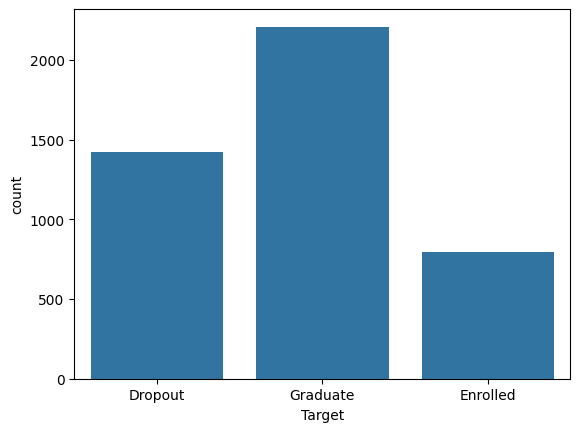

In [10]:
# visualize proportion of categories in 'Target'
sns.countplot(data = data, x = 'Target')

Shows imbalnced classes, especially in 'Enrolled'.

In [11]:
data['Marital status'].unique()

array([1, 2, 4, 3, 5, 6])

**Note:**
1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated

In [12]:
# count of marital statuses among candidates
data['Marital status'].value_counts()

,count
Marital status,
1,3919
2,379
4,91
5,25
6,6
3,4


A significant portion of the students in the dataset appear to be **single**. This is generally expected, as the typical age range for undergraduate students (18-22) is often associated with a lower likelihood of marriage or long-term partnerships. However, without further data on student marital status and age demographics, it's important to avoid generalizations.

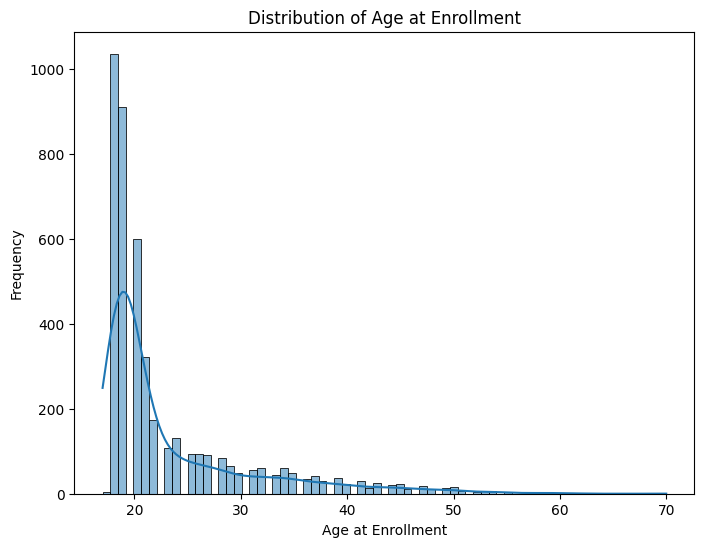

In [13]:
# Explore the distribution of 'Age at enrollment'
plt.figure(figsize=(8, 6))
sns.histplot(data['Age at enrollment'], kde=True)
plt.title('Distribution of Age at Enrollment')
plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')
plt.show()

"The distribution of student ages aligns with the typical age range for undergraduate students, with the majority being young adults. The right skew indicates a smaller proportion of older students.

## Application Mode

Categorical varibale with the following meaning:

* 1 - 1st phase - general contingent
* 2 - Ordinance No. 612/93
* 5 - 1st phase - special contingent (Azores Island)
* 7 - Holders of other higher courses
* 10 - Ordinance No. 854-B/99
* 15 - International student (bachelor)
* 16 - 1st phase - special contingent (Madeira Island)
* 17 - 2nd phase - general contingent
* 18 - 3rd phase - general contingent
* 26 - Ordinance No. 533-A/99, item b2) (Different Plan)
* 27 - Ordinance No. 533-A/99, item b3 (Other Institution)
* 39 - Over 23 years old
* 42 - Transfer
* 43 - Change of course
* 44 - Technological specialization diploma holders
* 51 - Change of institution/course
* 53 - Short cycle diploma holders

In [14]:
# application mode
data['Application mode'].value_counts()

,count
Application mode,
1,1708
17,872
39,785
43,312
44,213
7,139
18,124
42,77
51,59


The most popular application mode is 1st phase - general contingent

## Courses

* 33 - Biofuel Production Technologies
* 171 - Animation and Multimedia Design
* 8014 - Social Service (evening attendance)
* 9003 - Agronomy
* 9070 - Communication Design
* 9085 - Veterinary Nursing
* 9119 - Informatics Engineering
* 9130 - Equinculture
* 9147 - Management
* 9238 - Social Service
* 9254 - Tourism
* 9500 - Nursing
* 9556 - Oral Hygiene
* 9670 - Advertising and Marketing Management
* 9773 - Journalism and Communication
* 9853 - Basic Education
* 9991 - Management (evening attendance)

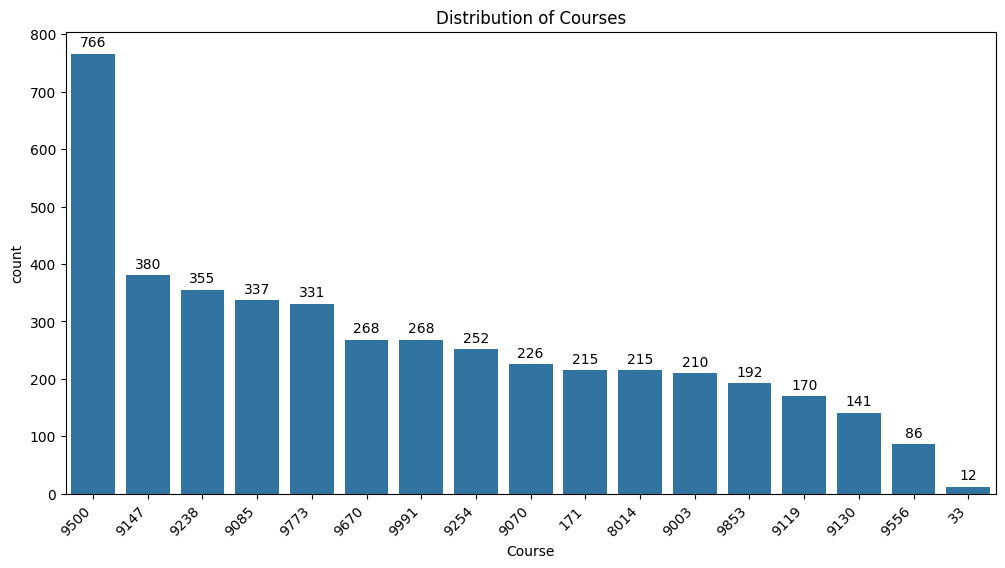

In [15]:
 # Analyze the 'Course' variable, Get the frequency of each course
course_counts = data['Course'].value_counts()

# Get the sorted course labels
sorted_courses = course_counts.index

# Create the countplot with sorted courses
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
ax = sns.countplot(data=data, x='Course', order=sorted_courses)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# To add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Courses')
plt.show()

The top three three most popular courses are  Nursing, Management and Social Service.

In [16]:
# Explore the distribution of 'Application order'
(data['Application order'].value_counts())

,count
Application order,
1,3026
2,547
3,309
4,249
5,154
6,137
9,1
0,1


Application Order, a categorical variable arranged in order, 0 - first choice, 9 - last choice.

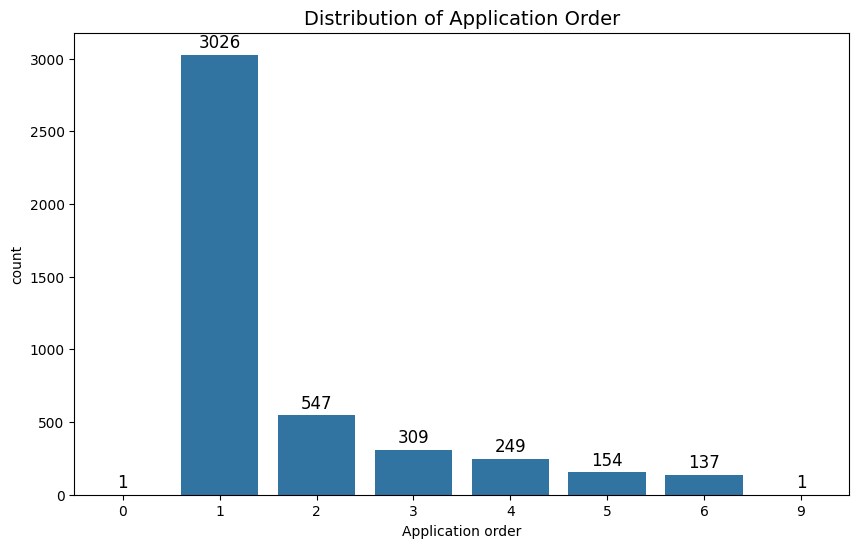

In [17]:
# visualize..
plt.figure(figsize=(10, 6))  # Increase figure size (width, height)
x = sns.countplot(data=data, x='Application order')
plt.title('Distribution of Application Order', fontsize=14) # Add title
ax = x.axes  # Assign the axes of the plot to ax
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

The most frequent application order is '1' (the student's second choice), with 3026 students selecting it.

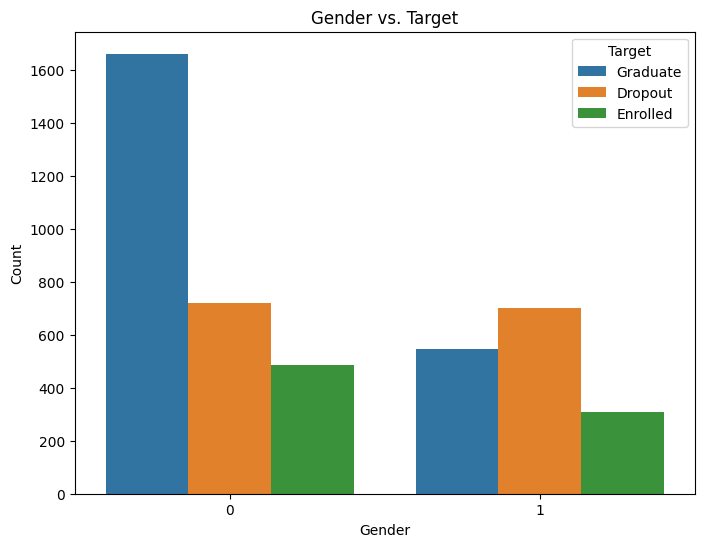

In [18]:
# Analyze the relationship between 'Gender' and 'Target'
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Target', data=data)
plt.title('Gender vs. Target')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The data reveals a gender disparity in educational outcomes. There are more male graduates than females, and fewer females are enrolled in school. However, the number of male and female dropouts is roughly equal.

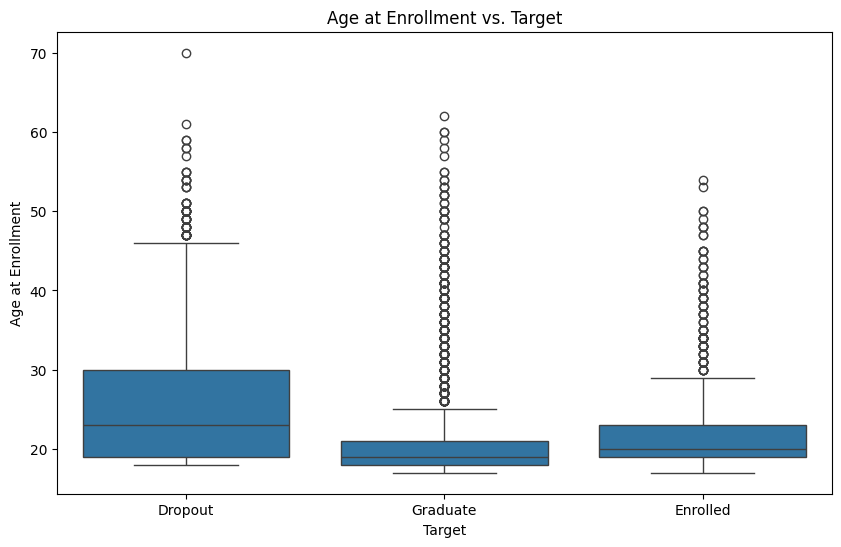

In [19]:
# Analyze the relationship between 'Age at enrollment' and 'Target'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age at enrollment', data=data)
plt.title('Age at Enrollment vs. Target')
plt.xlabel('Target')
plt.ylabel('Age at Enrollment')
plt.show()

The dataset contains some outliers, particularly in the 'Age at enrollment' variable for different class of target, likely due to the presence of older individuals.

In [20]:
# Create a countplot with Plotly Express
fig = px.histogram(data, x="Marital status", color="Target",
                   barmode='group',  # Group bars for each target category
                   title="Marital Status vs. Target",
                   labels={"Marital status": "Marital Status", "count": "Count"})

fig.update_layout(xaxis_title="Marital Status", yaxis_title="Count")
fig.update_yaxes(type="log")
fig.show()

In [21]:
# Calculate dropout rates for each course
dropout_rates = data[data['Target'] == 'Dropout'].groupby('Course')['Target'].count() / data.groupby('Course')['Target'].count() * 100
dropout_rates = dropout_rates.sort_values(ascending=False)
dropout_rates

,Target
Course,
33,66.666667
9130,55.319149
9119,54.117647
9991,50.746269
9853,44.270833
9003,40.952381
9556,38.372093
171,38.139535
9254,38.095238


Biofuel Production Technologies has the highest dropout rate of about 67%. In contrast, Nursing has the lowest dropout rate at 15.4%, suggesting that students enrolled in Nursing are more likely to persist in their studies.

In [22]:
# Calculate rates Graduates for each course
grad_rates = data[data['Target'] == 'Graduate'].groupby('Course')['Target'].count() / data.groupby('Course')['Target'].count() * 100
grad_rates = dropout_rates.sort_values(ascending=False)
grad_rates

,Target
Course,
33,66.666667
9130,55.319149
9119,54.117647
9991,50.746269
9853,44.270833
9003,40.952381
9556,38.372093
171,38.139535
9254,38.095238


Nursing has the highest graduation rate, with 71.5% of its students successfully completing the program. In contrast, Informatics Engineering has the lowest graduation rate at 8.2%.

In [23]:
 # replace 'Nacionality' with 'Nationality'
 data = data.rename(columns={'Nacionality': 'Nationality'})

**Nationality**

categorical variable

1 - Portuguese

2 - German

6 - Spanish

11 - Italian

13 - Dutch

14 - English

17 - Lithuanian

21 - Angolan

22 - Cape Verdean

24 - Guinean

25 - Mozambican

26 - Santomean

32 - Turkish

41 - Brazilian

62 - Romanian

100 - Moldova (Republic of)

101 - Mexican

103 - Ukrainian

105 - Russian

108 - Cuban

109 - Colombian

In [24]:
# Distribution of Nationality
data['Nationality'].value_counts()

,count
Nationality,
1,4314
41,38
26,14
22,13
6,13
24,5
100,3
11,3
103,3


Majority of the students are portuguese.

**Mother's Qualification**

- 1 - Secondary Education - 12th Year of Schooling or Equivalent
- 2 - Higher Education - Bachelor's Degree
- 3 - Higher Education - Degree
- 4 - Higher Education - Master's
- 5 - Higher Education - Doctorate
- 6 - Frequency of Higher Education
- 9 - 12th Year of Schooling - Not Completed
- 10 - 11th Year of Schooling - Not Completed
- 11 - 7th Year (Old)
- 12 - Other - 11th Year of Schooling
- 14 - 10th Year of Schooling
- 18 - General Commerce Course
- 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent
- 22 - Technical-Professional Course
- 26 - 7th Year of Schooling
- 27 - 2nd Cycle of the General High School Course
- 29 - 9th Year of Schooling - Not Completed
- 30 - 8th Year of Schooling
- 34 - Unknown
- 35 - Can't Read or Write
- 36 - Can Read Without Having a 4th Year of Schooling
- 37 - Basic Education 1st Cycle (4th/5th Year) or Equivalent
- 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equivalent
- 39 - Technological Specialization Course
- 40 - Higher Education - Degree (1st Cycle)
- 41 - Specialized Higher Studies Course
- 42 - Professional Higher Technical Course
- 43 - Higher Education - Master (2nd Cycle)
- 44 - Higher Education - Doctorate (3rd Cycle)


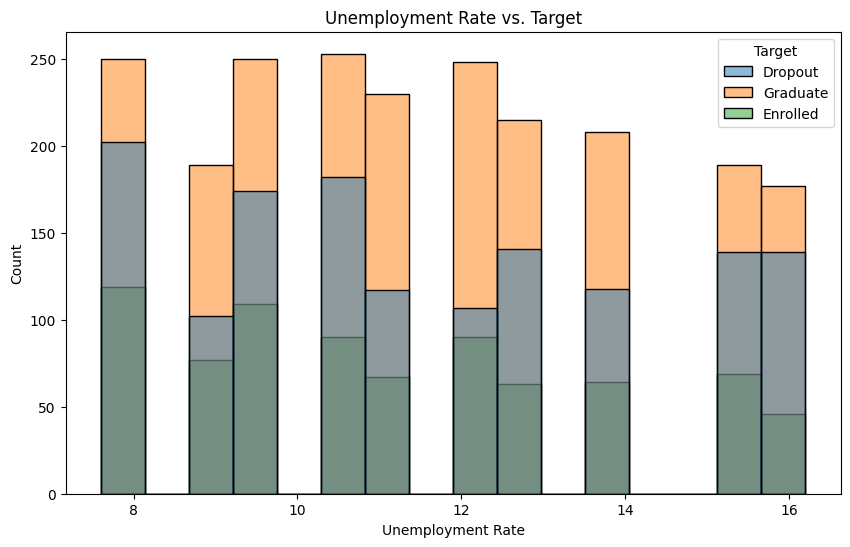

In [25]:
# histomgram for unemployment rate
plt.figure(figsize=(10, 6))  # Set figure size first
sns.histplot(x='Unemployment rate', data=data, hue='Target')
plt.title('Unemployment Rate vs. Target')
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.show()

The histogram shows an unexpected trend: as unemployment rises, dropout rates decrease. This counters the usual expectation that higher unemployment increases dropouts due to financial pressures. One possibility is that higher dropout rates may contribute to increased unemployment, as those without degrees face more job challenges. Further investigation is needed to understand this relationship.